<a href="https://colab.research.google.com/github/Pr1yanshi/ML_Project/blob/main/Individual_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Project Name : Netflix Movies and TV Shows Clustering**
# Project Type unsupervised ML
# Batch : Cohort Seoul

# making some hypothesis

# Hypothesis Testing

In [ ]:
df['type'].value_counts()

type
Movie      5377
TV Show    2400
Name: count, dtype: int64

In [ ]:
#creating two extra columns
tv_shows=df[df['type']=='TV Show']
movies=df[df['type']=='Movie']
movies

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description
1,s2,Movie,7:19,Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,United States,"January 1, 2020",2013,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
6,s7,Movie,122,Egypt,"June 1, 2020",2019,TV-MA,95 min,"Horror Movies, International Movies","After an awful accident, a couple admitted to ..."
...,...,...,...,...,...,...,...,...,...,...
7781,s7782,Movie,Zoom,United States,"January 11, 2020",2013,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
7782,s7783,Movie,Zozo,"Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2013,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."


In [ ]:
#np.mean(movies)
movies.count().mean()


5353.5

In [ ]:
movies.duration

1        93 min
2        78 min
3        80 min
4       123 min
6        95 min
         ...   
7781     88 min
7782     99 min
7783    111 min
7784     44 min
7786     90 min
Name: duration, Length: 5377, dtype: object

In [ ]:
#making copy of df_clean_frame
df_hypothesis=df.copy()
#head of df_hypothesis
df_hypothesis.head()

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,United States,"January 1, 2020",2013,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [ ]:
#filtering movie from Type_of_show column
df_hypothesis = df_hypothesis[df_hypothesis["type"] == "Movie"]

In [ ]:
#with respect to each ratings assigning it into group of categories
ratings_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}

df_hypothesis['target_ages'] = df_hypothesis['rating'].replace(ratings_ages)
#let's see unique target ages
df_hypothesis['target_ages'].unique()

array(['Adults', 'Teens', 'Older Kids', 'Kids', nan], dtype=object)

In [ ]:
#Another category is target_ages (4 classes).
df_hypothesis['target_ages'] = pd.Categorical(df_hypothesis['target_ages'], categories=['Kids', 'Older Kids', 'Teens', 'Adults'])
#from duration feature extractin string part and after extracting Changing the object type to numeric
df_hypothesis['duration']= df_hypothesis['duration'].str.extract('(\d+)')
df_hypothesis['duration'] = pd.to_numeric(df_hypothesis['duration'])
#head of df_
df_hypothesis.head(3)


,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,target_ages
1,s2,Movie,7:19,Mexico,"December 23, 2016",2016,TV-MA,93,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,Adults
2,s3,Movie,23:59,Singapore,"December 20, 2018",2011,R,78,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",Adults
3,s4,Movie,9,United States,"November 16, 2017",2009,PG-13,80,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",Teens


In [ ]:

#group_by duration and target_ages
group_by_= df_hypothesis[['duration','target_ages']].groupby(by='target_ages')
#mean of group_by variable
group=group_by_.mean().reset_index()
group

,target_ages,duration
0,Kids,66.486891
1,Older Kids,92.024648
2,Teens,110.025332
3,Adults,98.275145


In [ ]:
#In A and B variable grouping values
A= group_by_.get_group('Kids')
A=A['duration']
#print(A)

B= group_by_.get_group('Older Kids')
B=B['duration']
#print(B)
#mean and std. calutation for kids and older kids variables
M1 = A.mean()
S1 = A.std()

M2= B.mean()
S2 = B.std()

print('Mean for movies rated for Kids {} \n Mean for  movies rated for older kids {}'.format(M1,M2))
print('Std for  movies rated for Older Kids {} \n Std for  movies rated for kids {}'.format(S2,S1))

Mean for movies rated for Kids 66.48689138576779 
 Mean for  movies rated for older kids 92.02464788732394
Std for  movies rated for Older Kids 31.182576758429978 
 Std for  movies rated for kids 31.739464779840176


In [ ]:
from scipy.stats import ttest_ind
ttest,pval = ttest_ind(M1, M2)
print(pval)
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

nan
accept null hypothesis


In [ ]:
#import stats
from scipy import stats
#length of groups and DOF
n1 = len(A)
n2= len(B)
print(n1,n2)

dof = n1+n2-2
print('dof',dof)

sp_2 = ((n2-1)*S1**2  + (n1-1)*S2**2) / dof
print('SP_2 =',sp_2)

sp = np.sqrt(sp_2)
print('SP',sp)

#tvalue
t_val = (M1-M2)/(sp * np.sqrt(1/n1 + 1/n2))
print('tvalue',t_val)

267 852
dof 1117
SP_2 = 999.0491470682085
SP 31.6077387212089
tvalue -11.51992627853396


In [ ]:
#t-distribution
stats.t.ppf(0.025,dof)


-1.9620900365868952

In [ ]:
#t-distribution
stats.t.ppf(0.975,dof)

1.9620900365868947

Because the t-value is not in the range, the null hypothesis is rejected.

As a result, movies rated for kids and older kids are not at least two hours long.

In [ ]:
df.dtypes

show_id         object
type            object
title           object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

* ### <b>4.7 Title

* #### 4.7.1 No of unique title present in title column

In [ ]:
df.title.nunique()

7777

In [ ]:
df.shape[0]

7777

* All the values present in Title are unique

* #### 4.7.2 Most occured word in *Title* ??

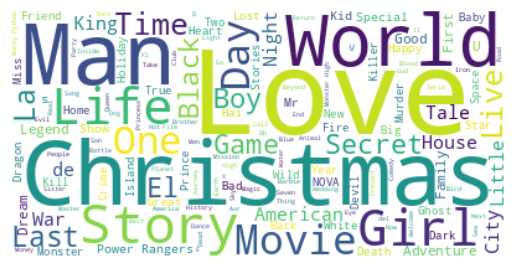

In [ ]:
#subsetting df
df_wordcloud = df['title']
text = " ".join(word for word in df_wordcloud)
# Create stopword list:
stopwords = set(STOPWORDS)
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

1. Why did you pick the specific chart?

Word clouds provide a visually striking way to display text data, with important words or themes emphasized through larger font sizes. This makes it easy to spot the most prominent terms at a glance.By visualizing word frequencies, analysts can identify patterns, trends, or outliers that may warrant further investigation.In text mining and sentiment analysis tasks, word clouds can be used to visualize the most common words associated with specific sentiments or topics.

2. What is/are the insight(s) found from the chart?


<br>It seems like words like "Love", "Man", "World", "Story" , "Christmas" are very common in titles.

I have suprised to see "Christmas" ocuured so many time .
The reason maybe those movies released on the month of december, but I don't have any information about the release month of movies that's why I am not able to check my hypothesis.


3. Will the gained insights help creating a positive business impact?

Yes, It will help to gain insight regarding popular words which can be further used in marketing.

### 4.8 **Countries** producing most number of contents

* #### 4.8.1 Checking no of unique values present in Country ?

In [ ]:
df.country.nunique()

681

* As you can see there are total 681 countries which are produce movies / tv shows

* #### 4.8.2 Using *value_counts()*

In [ ]:
df.country.value_counts().rename_axis('Country').reset_index(name='counts').T

,0,1,2,3,4,5,6,7,8,9,...,671,672,673,674,675,676,677,678,679,680
Country,United States,India,United Kingdom,Japan,South Korea,Canada,Spain,France,Egypt,Turkey,...,"United States, South Korea, Japan","Lebanon, United Arab Emirates, France, Switzer...","France, Australia, Germany","Ireland, United States","United States, Canada, Germany","Russia, United States, China","Italy, Switzerland, France, Germany","United States, United Kingdom, Canada","United States, United Kingdom, Japan","Sweden, Czech Republic, United Kingdom, Denmar..."
counts,2549,923,396,225,183,177,134,115,101,100,...,1,1,1,1,1,1,1,1,1,1


* #### 4.8.2 Check no of NaN values

In [ ]:
df.country.isna().sum()

506

* Let's replace those NaN values with mode value

In [ ]:
#mode value of country column
df.country.mode()[0]

'United States'

In [ ]:
df.country[df.country.isna()] = df.country.mode()[0]

In [ ]:
df.country[df.country.isna()]

Series([], Name: country, dtype: object)

In [ ]:
df.country.isna().sum()

0

* Now there is no NaN values present

* #### 4.8.3 Looking for countries and number of netflix productions

In [ ]:
country_list=[]
tv_show=[]
movies=[]
for i in range(0,len(df)):
  if isinstance(df['country'].iloc[i] , str):
    split=df['country'].iloc[i].split(',')
    for k in split:
      country_list.append(k.strip())
      if df['type'].iloc[i]=='TV Show':
        tv_show.append(k.strip())
      if df['type'].iloc[i]== 'Movie':
        movies.append(k.strip())
production_country=list(set([(i,country_list.count(i),tv_show.count(i),movies.count(i)) for i in country_list]))

In [ ]:
production_country[:5]

[('Thailand', 65, 22, 43),
 ('', 4, 0, 4),
 ('Israel', 26, 8, 18),
 ('Soviet Union', 3, 0, 3),
 ('Germany', 199, 42, 157)]

* #### 4.8.4 Creating a new DataFrame *country_df*

In [ ]:
country_df= pd.DataFrame(production_country,columns=['country','Productions','TV-Shows','Movies'])
country_df=country_df.sort_values('Productions',ascending=False)
country_df=country_df.reset_index()
country_df=country_df.drop('index',axis=1)

In [ ]:
#Top 5 countries
top_countries=country_df.head()
top_countries

,country,Productions,TV-Shows,Movies
0,United States,3797,1136,2661
1,India,990,75,915
2,United Kingdom,722,255,467
3,Canada,412,126,286
4,France,349,84,265


In [ ]:
top_countries.T

,0,1,2,3,4
country,United States,India,United Kingdom,Canada,France
Productions,3797,990,722,412,349
TV-Shows,1136,75,255,126,84
Movies,2661,915,467,286,265


<Axes: xlabel='country'>

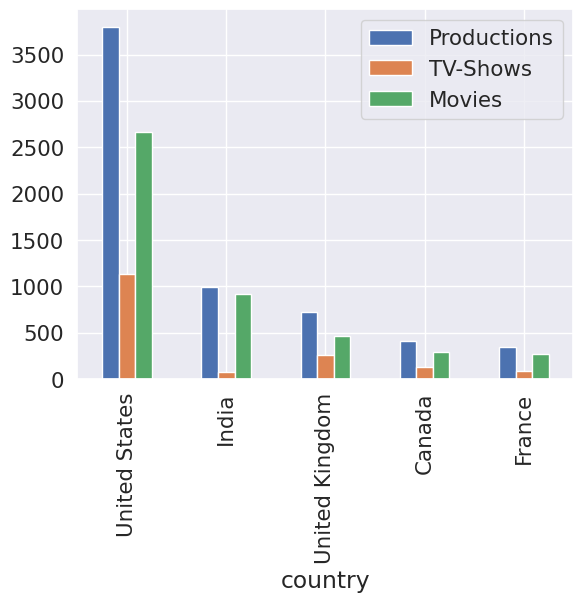

In [ ]:
top_countries.head(9).plot(x="country", y=['Productions','TV-Shows','Movies'], kind="bar")

1. Why did you pick the specific chart?

Grouped bar charts can be used to visualize relationships and patterns between different variables or factors. By grouping bars according to categories or subcategories.The visual separation of bars within each group makes it easy to see variations in values across the categories.

2. What is/are the insight(s) found from the chart?

The graph shows different countries and the count of productions,TV shows and movies.The count was maximum for the US and minimum for the France.

* ### 4.9 **Type**

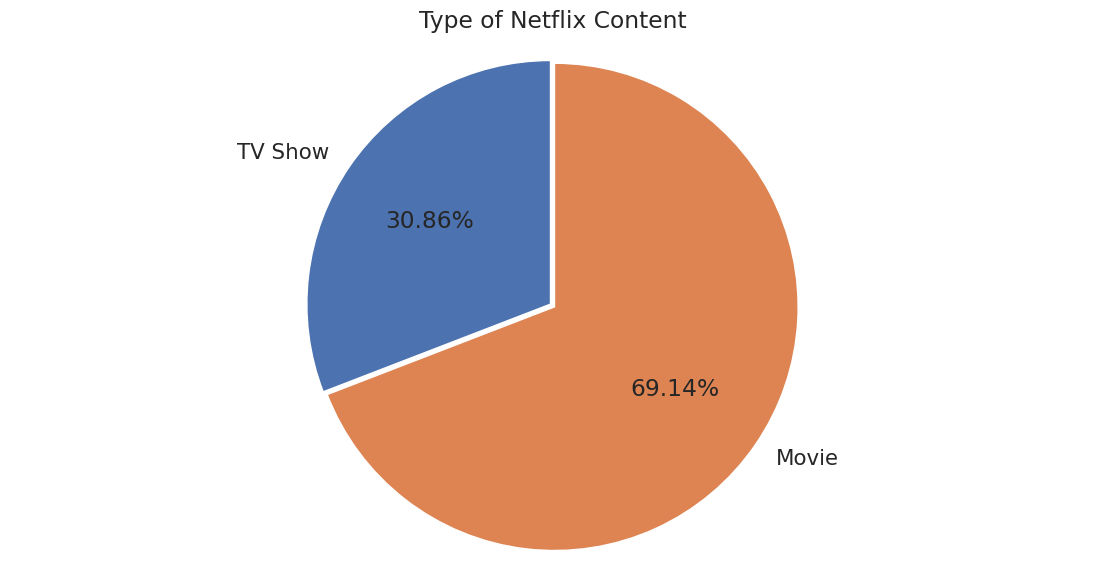

In [ ]:
#Plotting pie chart on type feature
plt.figure(figsize=(14, 7))
labels=['TV Show', 'Movie']
plt.pie(df['type'].value_counts().sort_values(),labels=labels,explode=[0.01,0.01],
        autopct='%1.2f%%', startangle=90)
plt.title('Type of Netflix Content')
plt.axis('equal')
plt.show()

1. Why did you pick the specific chart?

Pie charts are effective for showing the proportional relationship between different categories or parts of a whole. Each slice of the pie represents a proportion of the total, making it easy to see the relative size of each category.Pie charts are useful for summarizing categorical data with a small number of categories. They provide a concise overview of the distribution of data and can quickly convey the main insights or trends present in the dataset.

2. What is/are the insight(s) found from the chart?

The percentage count for movies is more than TV shows.

3. Will the gained insights help creating a positive business impact?

* #### Most of the contents are Movies
* #### Less than ⅓ content are Tv Shows


* ### 4.10 **duration**

* #### 4.10.1 Checking NaN values

In [ ]:
df.duration.isna().sum()

0

* There is no NaN value present.

* #### 4.10.2 Checking datatype

In [ ]:
type(df.duration.iloc[0][0])

str

* #### 4.10.3 How many unique values present in duration column ??

In [ ]:
df.duration.nunique()

216

* #### 4.10.4 Using *value_count()* method

In [ ]:
df.duration.value_counts().to_frame().T

duration,1 Season,2 Seasons,3 Seasons,90 min,93 min,94 min,91 min,95 min,92 min,97 min,...,193 min,13 min,214 min,8 min,13 Seasons,9 min,182 min,224 min,233 min,191 min
count,1608,378,183,136,131,125,125,119,118,117,...,1,1,1,1,1,1,1,1,1,1


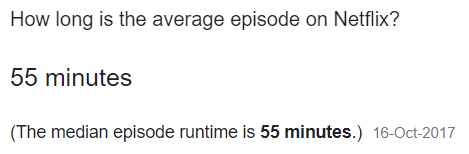

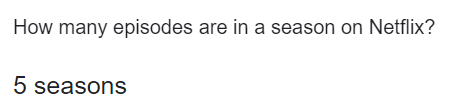

* #### 4.10.4 define *convert_seasons_to_min*

In [ ]:
def convert_seasons_to_min(value):
  """
  This function will calculate no of total mins as per season no.
  Here our assumptions are
    1. on average 5 episodes are there in a season.
    2. each episode avg time is 55 mins.
  """
  no_of_avg_episode = 5
  if "Seasons" in value:
    #containing more than 1 seasons
    value = value.replace("Seasons",'')
    value = value.replace(" ","")
    total_seasons = int(value)
    each_season_mins = ( no_of_avg_episode * 55 )
    total_mins = (total_seasons * each_season_mins)
    return total_mins

  elif "Season" in value:
    # containing only 1 season
    value = value.replace("Season",'')
    value = value.replace(" ","")
    total_mins = (no_of_avg_episode * 55)
    return total_mins

In [ ]:
#Checking the function
convert_seasons_to_min("4 Seasons")

1100

**"4 Seasons"** : <br>
4 Seasons = (4*5) or 20 episodes<br>
Each episode avg. time is 55 mins.<br>
Total time (in minutes. ) = (55*20) min<br> = 1100 mins
                         

* #### 4.10.5 define *all_the_duration_in_minutes*

In [ ]:
def all_the_duration_in_minutes():
  """
  This function will convert all the duration
  whether it's in minutes or season format to minute
  """
  # replaced all the min with null string
  df['duration'] = df.duration.str.replace(" min" , "")
  # this time_list will contain all the value
  time_list =[]
  for time in df.duration.values:
    if "Season" in time:
      #time is containing Season
      # calling convert_seasons_to_min function to convert
      # season to total min
      time = convert_seasons_to_min(time)
    else:
      #replacing single space with ""
      time = time.replace(" ","")
    #appending time (it's not containing words like min or seasons)
    time_list.append(time)

  #converting all the time into integer format
  time_list = [ int(Time) for Time in time_list]

  #Assigning time_list to df.duration
  df.duration = time_list

In [ ]:
df.duration.value_counts().to_frame().T

duration,1 Season,2 Seasons,3 Seasons,90 min,93 min,94 min,91 min,95 min,92 min,97 min,...,193 min,13 min,214 min,8 min,13 Seasons,9 min,182 min,224 min,233 min,191 min
count,1608,378,183,136,131,125,125,119,118,117,...,1,1,1,1,1,1,1,1,1,1


In [ ]:
all_the_duration_in_minutes()

In [ ]:
df.duration.value_counts().to_frame().T

duration,275,550,825,90,93,94,91,95,92,97,...,193,13,214,8,3575,9,182,224,233,191
count,1608,378,183,136,131,125,125,119,118,117,...,1,1,1,1,1,1,1,1,1,1


* #### 4.10.6 Analysis on the duration of the movies

<Axes: xlabel='duration', ylabel='Density'>

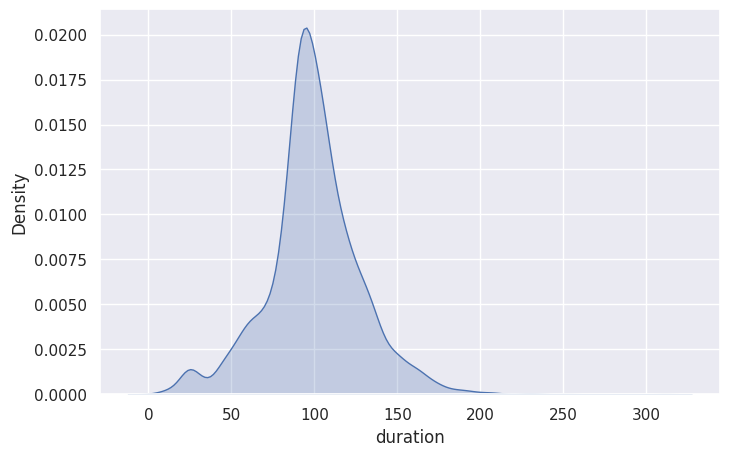

In [ ]:
sns.set(style="darkgrid")
plt.figure(figsize = (8,5))
sns.kdeplot(data = df.duration[df['type'] == 'Movie'] , shade=True)

1. Why did you pick the specific chart?

Kernel density estimation involves smoothing the data to create a continuous curve that approximates the underlying distribution. This can help reduce the impact of noise and provide a clearer visualization of the overall shape of the distribution.

2. What is/are the insight(s) found from the chart?

Most content are about 70 to 120 min duration for movies

* #### 4.10.7 Analysis on the duration of the TV-Shows

In [ ]:
df['type'].value_counts()

type
Movie      5377
TV Show    2400
Name: count, dtype: int64

<Axes: xlabel='duration', ylabel='Density'>

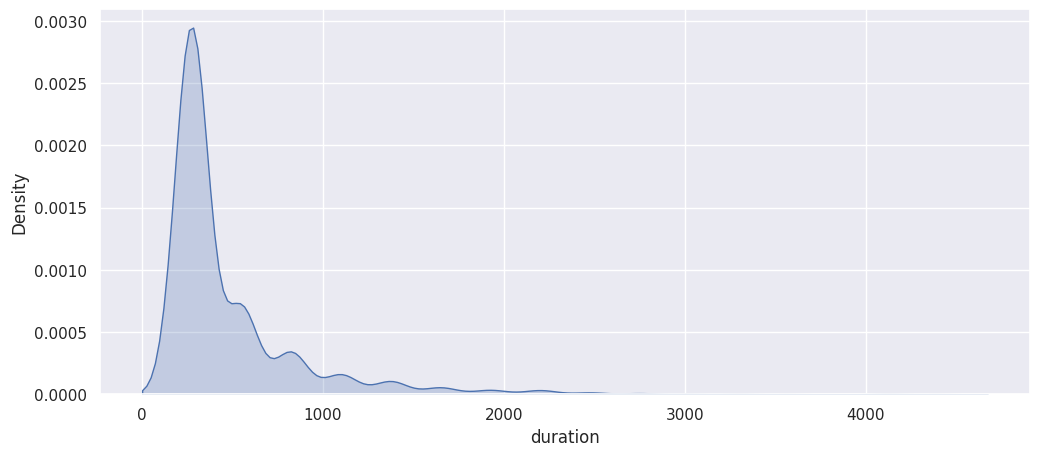

In [ ]:
sns.set(style="darkgrid")
plt.figure(figsize = (12,5))
sns.kdeplot(data = df.duration[df['type'] == 'TV Show'] , shade=True)

1. Why did you pick the specific chart?

Kernel density estimation involves smoothing the data to create a continuous curve that approximates the underlying distribution. This can help reduce the impact of noise and provide a clearer visualization of the overall shape of the distribution.

2. What is/are the insight(s) found from the chart?

Most content are about 300 to 820 min duration for TV shows. Most of the contents got ratings like
* TV-MA (For Mature Audiences)
* TV-14 ( May be unsuitable for children under 14 )
* TV-PG ( Parental Guidance Suggested  )
* NR ( Not Rated )

### 4.11 **listed_in**

* #### 4.11.1 How many unique values present in listed_in ??

In [ ]:
df.listed_in.nunique()

491

There are all total 491 unique values present

* #### 4.11.2 How many NaN values present in *listed_in* ?

In [ ]:
df.listed_in.isna().sum()

0

There is no NaN values present

* #### 4.11.2 Value_counts()

In [ ]:
df.listed_in.value_counts().to_frame().T

listed_in,Documentaries,Stand-Up Comedy,"Dramas, International Movies","Comedies, Dramas, International Movies","Dramas, Independent Movies, International Movies",Kids' TV,Children & Family Movies,"Documentaries, International Movies","Children & Family Movies, Comedies","Comedies, International Movies",...,"TV Horror, TV Mysteries, Teen TV Shows","Action & Adventure, International Movies, Thrillers","Anime Series, TV Horror, TV Thrillers","Action & Adventure, Faith & Spirituality, Sci-Fi & Fantasy","TV Dramas, TV Sci-Fi & Fantasy, Teen TV Shows","Anime Series, Crime TV Shows, TV Thrillers","Crime TV Shows, Romantic TV Shows, Spanish-Language TV Shows","Crime TV Shows, International TV Shows, Reality TV","International Movies, Romantic Movies, Sci-Fi & Fantasy","International TV Shows, Spanish-Language TV Shows, Stand-Up Comedy & Talk Shows"
count,334,321,320,243,215,204,177,172,169,161,...,1,1,1,1,1,1,1,1,1,1


* #### 4.11.3 Making **Categories**

In [ ]:
categories = ", ".join(df['listed_in']).split(", ")
categories[:5]

['International TV Shows',
 'TV Dramas',
 'TV Sci-Fi & Fantasy',
 'Dramas',
 'International Movies']

In [ ]:
len(categories)

17051

In [ ]:
len(set(categories))

42

There are **42 unique categories**  present & in this dataset **all the categories occured in total 17051 times**

Creating a dictionary **( *category_wise_count* )** where for each category there will be a value which basically tells us how many times that particular category occured

In [ ]:
category_wise_count = {}
for category in set(categories):
  category_wise_count[category] = categories.count(category)

In [ ]:
category_wise_count

{'Sports Movies': 196,
 'Horror Movies': 312,
 'International Movies': 2437,
 'Sci-Fi & Fantasy': 218,
 'Spanish-Language TV Shows': 146,
 'Classic Movies': 103,
 'TV Comedies': 518,
 'Anime Features': 57,
 'TV Thrillers': 50,
 'Movies': 56,
 'Faith & Spirituality': 57,
 'Action & Adventure': 721,
 'Reality TV': 222,
 'Anime Series': 147,
 'Music & Musicals': 321,
 'TV Sci-Fi & Fantasy': 75,
 'TV Mysteries': 90,
 'Science & Nature TV': 85,
 'Children & Family Movies': 532,
 'LGBTQ Movies': 90,
 'Romantic Movies': 531,
 'Documentaries': 786,
 'TV Dramas': 703,
 'Independent Movies': 673,
 'Stand-Up Comedy': 329,
 'Korean TV Shows': 150,
 'Stand-Up Comedy & Talk Shows': 52,
 'Classic & Cult TV': 25,
 'TV Horror': 69,
 'Dramas': 2106,
 'International TV Shows': 1198,
 'TV Shows': 12,
 'Docuseries': 352,
 'Thrillers': 491,
 'Teen TV Shows': 60,
 'Comedies': 1471,
 'TV Action & Adventure': 149,
 "Kids' TV": 412,
 'Romantic TV Shows': 333,
 'British TV Shows': 231,
 'Cult Movies': 59,
 'Crim

* Sorting *category_wise_count* by value

In [ ]:
sorted_category_wise_count = sorted(category_wise_count.items(), key=lambda x: x[1])
sorted_category_wise_count[:4]

[('TV Shows', 12),
 ('Classic & Cult TV', 25),
 ('TV Thrillers', 50),
 ('Stand-Up Comedy & Talk Shows', 52)]

* Top 5 least occurred category

In [ ]:
sorted_category_wise_count[:5]

[('TV Shows', 12),
 ('Classic & Cult TV', 25),
 ('TV Thrillers', 50),
 ('Stand-Up Comedy & Talk Shows', 52),
 ('Movies', 56)]

* Top 5 most occurred category

In [ ]:
sorted_category_wise_count[-5:]

[('Documentaries', 786),
 ('International TV Shows', 1198),
 ('Comedies', 1471),
 ('Dramas', 2106),
 ('International Movies', 2437)]

* Top 10 most occurred categories

In [ ]:
top_10_most_occurred_categories = sorted_category_wise_count[-10:]

In [ ]:
top_10_most_occurred_categories

[('Romantic Movies', 531),
 ('Children & Family Movies', 532),
 ('Independent Movies', 673),
 ('TV Dramas', 703),
 ('Action & Adventure', 721),
 ('Documentaries', 786),
 ('International TV Shows', 1198),
 ('Comedies', 1471),
 ('Dramas', 2106),
 ('International Movies', 2437)]

In [ ]:
top_10_most_occurred_category_name = []
top_10_most_occurred_category_count = []
for tup in top_10_most_occurred_categories:
  top_10_most_occurred_category_name.append(tup[0])
  top_10_most_occurred_category_count.append(tup[1])

In [ ]:
top_10_most_occurred_category_name

['Romantic Movies',
 'Children & Family Movies',
 'Independent Movies',
 'TV Dramas',
 'Action & Adventure',
 'Documentaries',
 'International TV Shows',
 'Comedies',
 'Dramas',
 'International Movies']

In [ ]:
top_10_most_occurred_category_count

[531, 532, 673, 703, 721, 786, 1198, 1471, 2106, 2437]

* #### 4.11.4 **TOP 10 Most Occurred Category By Count**

<Figure size 1600x800 with 0 Axes>

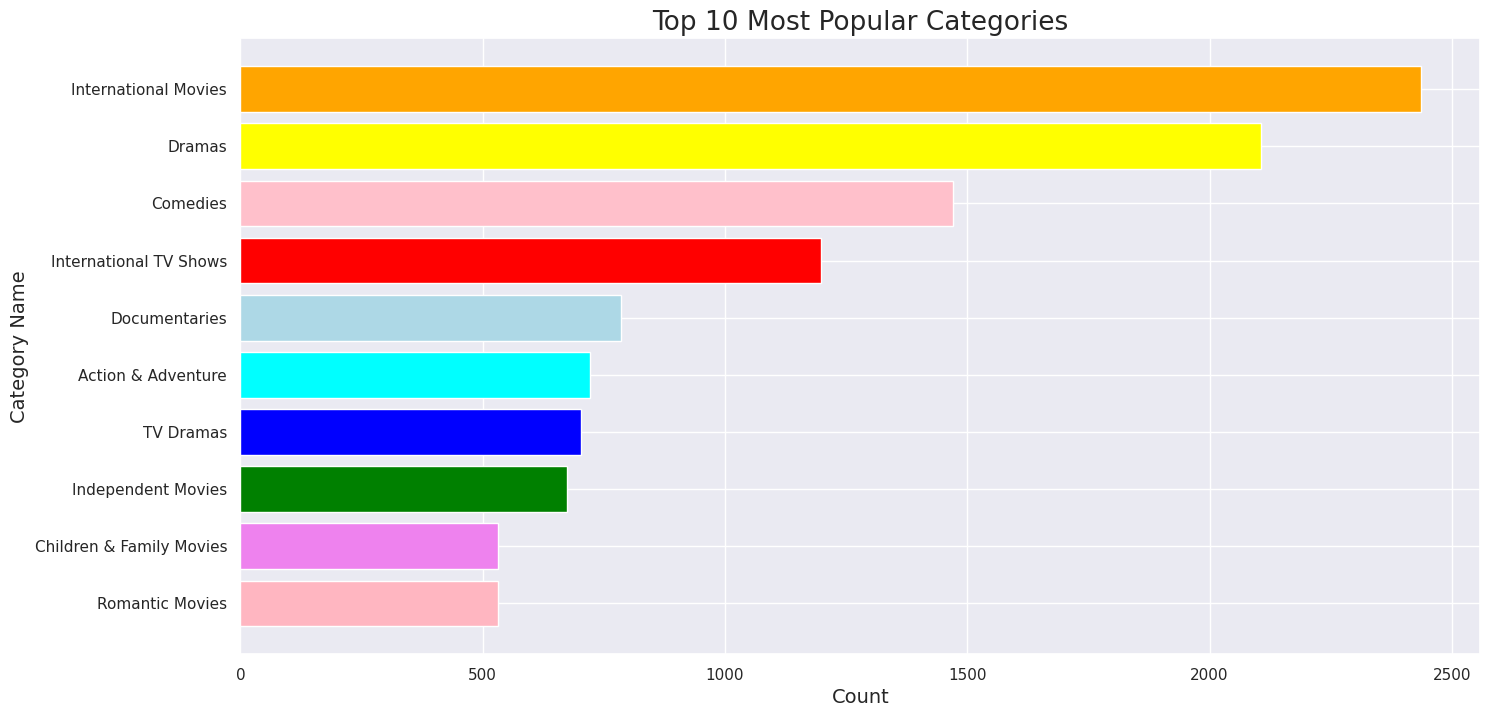

<Figure size 1600x800 with 0 Axes>

In [ ]:
plt.figure( figsize = (16,8))
color=['lightpink', 'violet', 'green', 'blue', 'cyan' , "lightblue" ,'red', 'pink', 'yellow', 'orange']
plt.barh(top_10_most_occurred_category_name , top_10_most_occurred_category_count ,
        color= color)
plt.title("Top 10 Most Popular Categories",fontsize = 19)
plt.xlabel("Count", fontsize = 14 )
plt.ylabel("Category Name" , fontsize = 14 )
plt.figure( figsize = (16,8))

1. Why did you pick the specific chart?

Bar charts can be used to display the frequency distribution of categorical data, showing how often each category occurs within the dataset. This is useful for understanding the distribution of responses or occurrences across different categories.

What is/are the insight(s) found from the chart?

2. The most prefered category is international content and least prefered is children,family and romantic content.

3. Will the gained insights help creating a positive business impact?

Yes, it helps in creating a positive business impact. Production companies or makers can make movies or TV shows based on popularity.

* #### 4.11.5 Creating a new column **no_of_category**

* Datatype of listed_in values

In [ ]:
type(df.listed_in.iloc[0])

str

In [ ]:
(df.listed_in.iloc[0])

'International TV Shows, TV Dramas, TV Sci-Fi & Fantasy'

In [ ]:
(df.listed_in.iloc[0]).split(",")

['International TV Shows', ' TV Dramas', ' TV Sci-Fi & Fantasy']

In [ ]:
len((df.listed_in.iloc[0]).split(","))

3

In [ ]:
no_of_category = []
for categories in df.listed_in.values:
  len_categories = len(categories.split(","))
  no_of_category.append(len_categories)

In [ ]:
df['no_of_category'] = no_of_category

In [ ]:
df[['listed_in' , 'no_of_category']].head()

,listed_in,no_of_category
0,"International TV Shows, TV Dramas, TV Sci-Fi &...",3
1,"Dramas, International Movies",2
2,"Horror Movies, International Movies",2
3,"Action & Adventure, Independent Movies, Sci-Fi...",3
4,Dramas,1


* #### 4.11.6 Histogram of *no_of_category* using *listed_in*

In [ ]:
df.no_of_category.unique()

array([3, 2, 1])

In [ ]:
df.no_of_category.value_counts()

no_of_category
3    3295
2    2684
1    1798
Name: count, dtype: int64

Text(0, 0.5, 'Count')

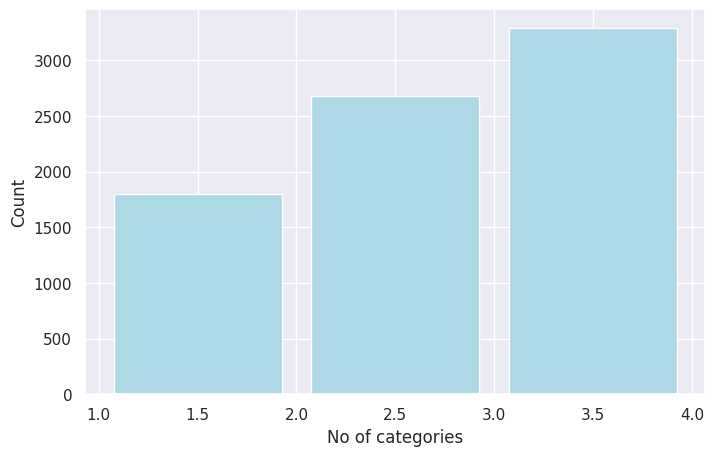

In [ ]:
sns.set(style="darkgrid")
plt.figure(figsize = (8,5))
plt.hist(df.no_of_category , bins=[1,2,3,4] , range = (1 ,4) , rwidth = 0.85, color ='lightblue')
plt.xlabel("No of categories")
plt.ylabel("Count")

1. Why did you pick the specific chart?

Histograms are particularly well-suited for visualizing continuous numerical data. They provide a smooth representation of the distribution without the need to discretize the data into categories or bins.

2. What is/are the insight(s) found from the chart?

The max number of frequency count is 3000+ and least is 1800.

* ### 4.12 Creating a new column **date_added_month** using *date_added* column

In [ ]:
df.date_added.head(3)

0      August 14, 2020
1    December 23, 2016
2    December 20, 2018
Name: date_added, dtype: object

In [ ]:
df['date_added_month'] = df['date_added'].apply(lambda x: x.split(" ")[0])
df[['date_added' , 'date_added_month']].head()

,date_added,date_added_month
0,"August 14, 2020",August
1,"December 23, 2016",December
2,"December 20, 2018",December
3,"November 16, 2017",November
4,"January 1, 2020",January


In [ ]:
month_df=df['date_added_month'].value_counts().reset_index()
month_df.rename(columns={'index': 'Month_Name'}, inplace=True)
month_df.rename(columns={'month': 'Count'}, inplace=True)
ab = month_df.loc[0:11]
ab

,date_added_month,count
0,December,817
1,October,780
2,January,746
3,November,730
4,March,661
5,September,614
6,August,612
7,April,596
8,July,592
9,June,538


In [ ]:
month_names = ab.date_added_month.values
month_wise_count = ab.date_added_month.values

Text(0, 0.5, 'Count')

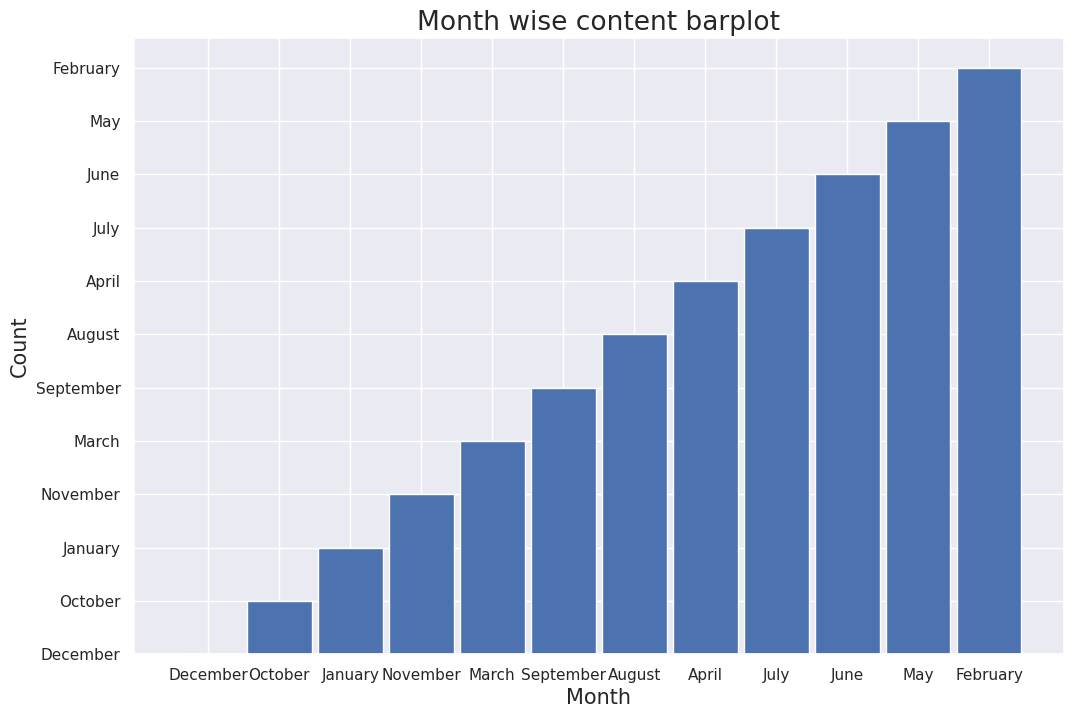

In [ ]:
plt.figure(figsize = (12 ,8 ))
plt.bar(month_names , month_wise_count, width = 0.91)
plt.title("Month wise content barplot" , fontsize = 19)
plt.xlabel("Month" , fontsize = 15)
plt.ylabel("Count" , fontsize = 15)

1. Why did you pick the specific chart?

Bar charts allow for easy comparison of values across different categories. The length of each bar directly represents the magnitude of the value associated with that category, making it intuitive to identify which categories have higher or lower values.

2. What is/are the insight(s) found from the chart?

3. Will the gained insights help creating a positive business impact?

Yes, it helps in creating a positive impact. We can say that December is the holiday season and it also has Christmas, so in that month most of the content got uploaded.

In [ ]:
df.date_added_month.value_counts().to_frame().T

date_added_month,December,October,January,November,March,September,August,April,July,June,May,February,
count,817,780,746,730,661,614,612,596,592,538,537,466,88


* ### 4.13 **show_id**

In [ ]:
df.columns

Index(['show_id', 'type', 'title', 'country', 'date_added', 'release_year',
       'rating', 'duration', 'listed_in', 'description', 'no_of_category',
       'date_added_month'],
      dtype='object')

* #### 4.13.1 Checking NaN values

In [ ]:
df.show_id.isna().sum()

0

There is no NaN value present in show_id

* #### 4.13.2 Using *value_counts()*

In [ ]:
df.show_id.value_counts()

show_id
s1       1
s5175    1
s5203    1
s5202    1
s5201    1
        ..
s2594    1
s2593    1
s2592    1
s2591    1
s7787    1
Name: count, Length: 7777, dtype: int64

In [ ]:
df.shape[0]

7777

All the *show_id* is **unique**

* #### 4.13.3 Checking datatype

In [ ]:
type(df.show_id.iloc[0])

str

In [ ]:
df.rating.value_counts()

rating
TV-MA       2861
TV-14       1928
TV-PG        804
R            665
PG-13        386
TV-Y         279
TV-Y7        270
PG           247
TV-G         194
NR            83
G             39
TV-Y7-FV       6
UR             5
NC-17          3
Name: count, dtype: int64

* #### 4.13.4 Most popular *TV-Shows Rating*

In [ ]:
df['type'].unique()

array(['TV Show', 'Movie'], dtype=object)

In [ ]:
df_tv_show = df[df['type']== 'TV Show' ]
df_tv_show.head(2)

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,no_of_category,date_added_month
0,s1,TV Show,3%,Brazil,"August 14, 2020",2020,TV-MA,1100,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,3,August
5,s6,TV Show,46,Turkey,"July 1, 2017",2016,TV-MA,275,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...,3,July


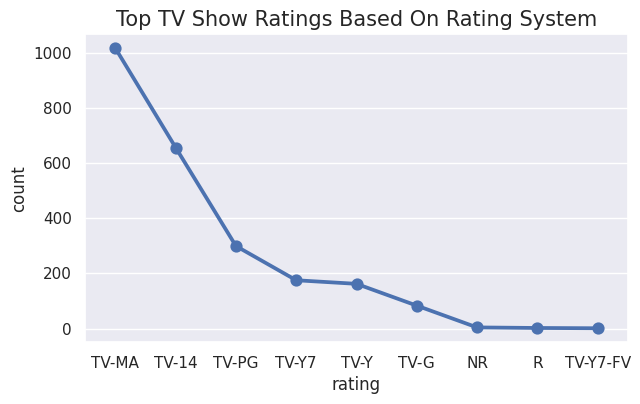

In [ ]:
#Pointplot on top tv show ratings
tv_ratings = df_tv_show.groupby(['rating'])['show_id'].count().reset_index(name = 'count').sort_values(by = 'count', ascending = False)
fig_dims = (7,4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.pointplot(x='rating',y='count',data=tv_ratings)
plt.title('Top TV Show Ratings Based On Rating System',size='15')
plt.show()

1. Why did you pick the specific chart?

Line charts connect data points with lines, visually interpolating between them. This makes it easier to perceive trends between individual data points and can help smooth out irregularities in the data.Line charts allow you to compare multiple series of data on the same plot.

2. What is/are the insight(s) found from the chart?

The highest TV show rating cout 1000 is of TV-MA and least 0 for NR,R,TV-Y7-FV.

3. Will the gained insights help creating a positive business impact?

Yes, it helps in creating a positive impact. As it identifies the most popular type of content which can be used in future production.

* #### 4.13.5 Most popular *Movies Rating*

In [ ]:
df_movies = df[df['type'] == 'Movie' ]
df_movies.head(2)

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,no_of_category,date_added_month
1,s2,Movie,7:19,Mexico,"December 23, 2016",2016,TV-MA,93,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2,December
2,s3,Movie,23:59,Singapore,"December 20, 2018",2011,R,78,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2,December


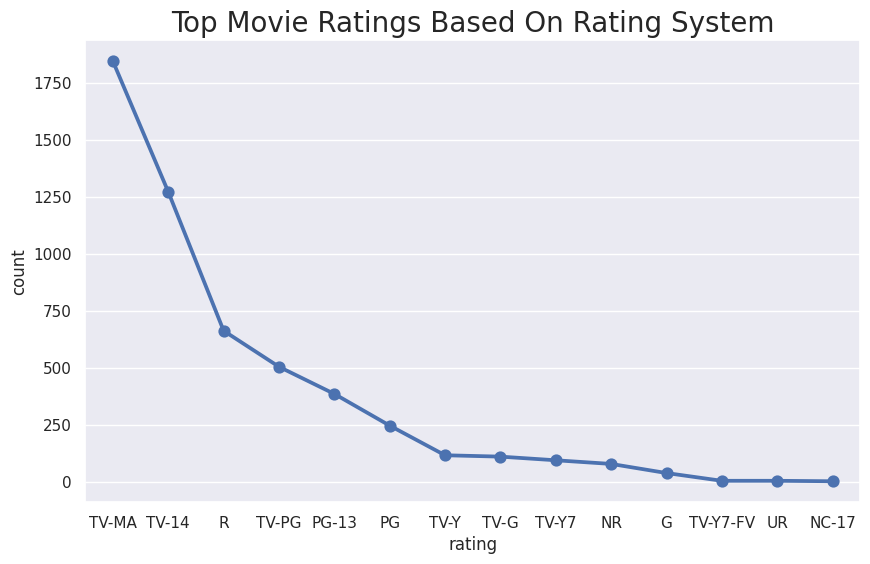

In [ ]:
#Pointplot on top tv show ratings
tv_ratings = df_movies.groupby(['rating'])['show_id'].count().reset_index(name = 'count').sort_values(by = 'count', ascending = False)
fig_dims = (10,6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.pointplot(x='rating',y='count',data=tv_ratings)
plt.title('Top Movie Ratings Based On Rating System',size='20')
plt.show()

1. Why did you pick the specific chart?

Line charts connect data points with lines, visually interpolating between them. This makes it easier to perceive trends between individual data points and can help smooth out irregularities in the data.Line charts allow you to compare multiple series of data on the same plot.

2. What is/are the insight(s) found from the chart?

Most of the contents got ratings like
* TV-MA (For Mature Audiences)
* TV-14 ( May be unsuitable for children under 14 )
* TV-PG ( Parental Guidance Suggested  )
* NR ( Not Rated )

3. Will the gained insights help creating a positive business impact?

Yes, it helps in creating a positive impact. As it identifies the most popular type of content which can be used in future production.


##Exploratory Data Analysis Conclusions
---
---
> * **Netflix began adding videos to the platform from 2008**
> * **The streaming giant started aggressively adding movies and TV shows from 2017**
> * **More movies are added as compared to TV shows**
---
> * **There are almost twice as many movies as TV shows on Netflix.**
---
> * **Most content on Netflix is rated for Mature Audiences and over 14 years old**
---
> **Top Countries in Netflix are:**
1. **United States**
2. **India**
3. **United Kingdom**
4. **Canada**
5. **France**

---
> **Top Genres in Netflix are:**
1. **Drama**
2.**Comedy**
3.**Documentary**
4.**Action and Adventure**
5.**Romance**

---
> **Top Directors on Netflix are:**
1. **Jan Suter**
2.**Raul Campos**
3.**Marcus Raboy**
4.**Jay Karas**
5.**Cathy Garcia-Molina**

---
> **Top Actors on Netflix are:**
1. **Anupam Kher**
2.**Shah Rukh Khan**
3.**Naseeruddin Shah**
4.**Om Puri**
5.**Akshay Kumar**

---
> * **Most movies on Netflix have a duration range from 90 to 110 minutes**
---
> * **Most TV shows on Netflix have a span of only one season**.
---

## <font size='+2' color = '#154085'> <B> End Conclusion.</b>

1. Director and cast contains a large number of null values so we will drop these 2 columns .
2. In this dataset there are two types of contents where 30.86% includes TV shows and the
remaining 69.14% carries Movies.
3. We have reached a conclusion from our analysis from the content added over years that
Netflix is focusing movies and TV shows (Fom 2016 data we get to know that Movies is
increased by 80% and TV shows is increased by 73% compare)
4. From the dataset insights we can conclude that the most number of TV Shows released in
2017 and for Movies it is 2020
5. On Netflix USA has the largest number of contents. And most of the countries preferred to
produce movies more than TV shows.
6. Most of the movies are belonging to 3 categories
7. TOP 3 content categories are International movies , dramas , comedies.
8. In text analysis (NLP) I used stop words, removed punctuations , stemming & TF-IDF
vectorizer and other functions of NLP.
9. Applied different clustering models like Kmeans, hierarchical, Agglomerative clustering,
DBSCAN on data we got the best cluster arrangements.
10.By applying different clustering algorithms to our dataset .we get the optimal number of
cluster is equal to 3
